In [1]:
pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Fraud
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:02<00:00, 30.2MB/s]


In [4]:
import os

In [5]:
os.listdir()

['.config', 'creditcardfraud', 'sample_data']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv('/content/creditcardfraud/creditcard.csv', sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
missing = data.isnull().sum()
percentage = (100*data.isnull().sum()/data.count())
pd.concat([missing, percentage], axis=1, keys=['Missing values', 'Percentage']).transpose()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Missing values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
duplicates = data.duplicated().sum()
duplicates

1081

In [10]:
data.shape

(284807, 31)

In [11]:
data = data.drop_duplicates(keep = False)
data.shape

(282953, 31)

In [12]:
number_of_fraud = data['Class'].sum()
total_fraud = data['Class'].count()
percentage_of_fraud = 100 * number_of_fraud / total_fraud

# Displays the percentage of fraudulent transactions
print(f'Number of fraudulent operations --> {number_of_fraud}')
print(f'Total number of operations --> {total_fraud}')
print(f'Percentage of fraudulent operations --> {percentage_of_fraud:.2f}%')

Number of fraudulent operations --> 460
Total number of operations --> 282953
Percentage of fraudulent operations --> 0.16%


In [13]:
mediafraudulentas = data[data.Class == 1]['Amount'].mean()

# Displays the average amount of fraudulent transactions
print(f'Average amount of fraudulent transactions --> {mediafraudulentas:.2f}')

Average amount of fraudulent transactions --> 124.05


In [14]:
number_of_no_fraud = total_fraud - number_of_fraud
total_no_fraud = total_fraud
percentage_of_no_fraud = 100 * number_of_no_fraud / total_fraud

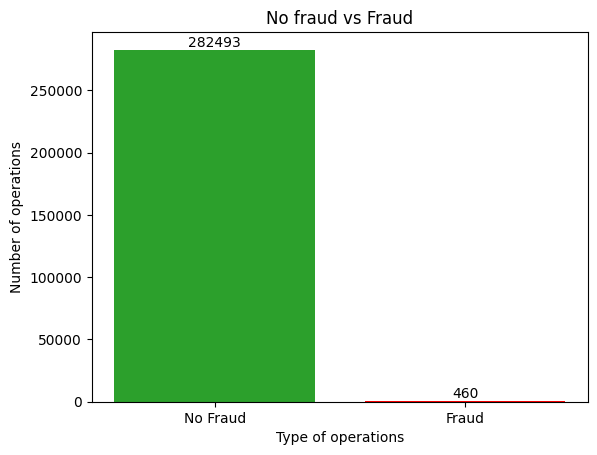

In [15]:
fig, ax = plt.subplots()
gbarras = ax.bar(['No Fraud', 'Fraud'], [number_of_no_fraud, number_of_fraud], color=['tab:green', 'red'])
ax.set_title('No fraud vs Fraud')
ax.set_ylabel('Number of operations')
ax.set_xlabel('Type of operations')
for bar in gbarras:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom')
plt.show()

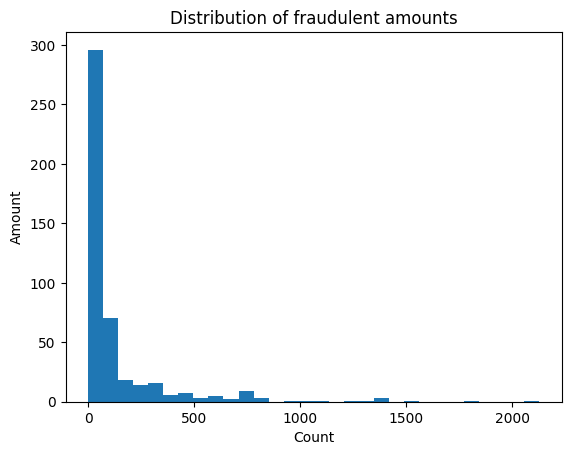

In [16]:
data_fraudulentas = data[data.Class == 1]['Amount']
data_fraudulentas.head()

# Shows the distribution of the amounts of fraudulent transactions
fig, ax = plt.subplots()
ghistogram = ax.hist(data_fraudulentas, bins=30)
ax.set_title('Distribution of fraudulent amounts')
ax.set_ylabel('Amount')
ax.set_xlabel('Count')
fig.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = data["Class"] # target variable
X = data.drop("Class", axis=1) # descriptive variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# we compare which are the final dimensions of the split
print('The dimensions of X_train are: ', X_train.shape)
print('The dimensions of y_train are: ', y_train.shape)
print('The dimensions of X_test are: ', X_test.shape)
print('The dimensions of y_test are: ', y_test.shape)

The dimensions of X_train are:  (226362, 30)
The dimensions of y_train are:  (226362,)
The dimensions of X_test are:  (56591, 30)
The dimensions of y_test are:  (56591,)


In [19]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(max_depth = 150, random_state = 42)
randomforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=150, random_state=42)

In [20]:
predictions = randomforest.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56498
           1       0.97      0.74      0.84        93

    accuracy                           1.00     56591
   macro avg       0.99      0.87      0.92     56591
weighted avg       1.00      1.00      1.00     56591



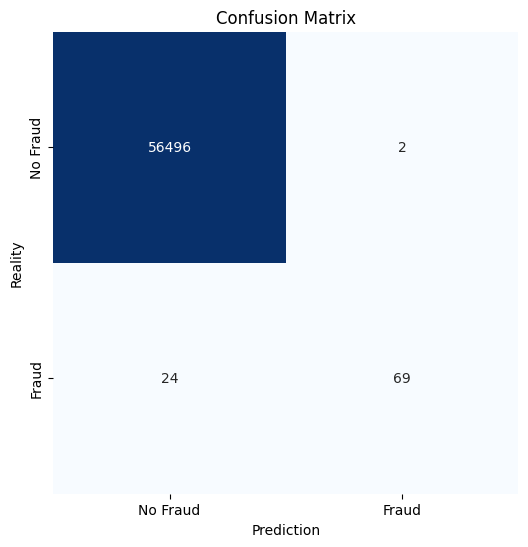

In [22]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
# Labels and title
plt.xlabel("Prediction")
plt.ylabel("Reality")
plt.title("Confusion Matrix")
plt.show()

In [23]:
accuracy = accuracy_score(y_test, predictions)
print(f"{accuracy:.2f}")

1.00
